# ISPY2_view_data
/Downloads/breast_mri/BreastDCEDL/BreastDCEDL/ISPY2_view_data.ipynb

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/naomifridman/BreastDCEDL/blob/main/ISPY2_view_data.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import sys
from pathlib import Path

In [2]:
# Add this at the beginning of your notebook

# Check if running in Google Colab

if 'google.colab' in str(get_ipython()):
    print("Running in Google Colab")
    # Clone the repository
    !git clone https://github.com/naomifridman/BreastDCEDL.git
    !pip install pydicom

    # Change to the repository directory
    os.chdir('/content/BreastDCEDL')


Running in Google Colab
fatal: destination path 'BreastDCEDL' already exists and is not an empty directory.


In [3]:

from PIL import Image
import requests
import argparse
import datetime
import json
import numpy as np
import os
import time
from pathlib import Path


In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image

In [5]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')

import os
from __future__ import print_function

import glob
from itertools import chain
import os
import random
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [7]:
from glob import glob
#from skimage import io
from sklearn.utils import shuffle

#from nipype.interfaces.ants import N4BiasFieldCorrection
import sys
import os
import ast

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os
import numpy as np

def print_info(ims):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    for im in ims:
        '''print(im.shape)
        sim = 1
        #for s in im.shape: sim*=s
        print(sim)'''
        print(im.shape, im.min(), im.max(), im.mean(), im.std(), \
              'n!=0:',im[im!=0].shape[0],im[im!=0].mean(),im.dtype)


import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# cb - cotrast_brightness
def show_n_images(imgs, cmap='gray', titles = None, enlarge = 4, mtitle=None,
                  cut = 0, axis_off = False, fontsize=15, cb = 0):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    plt.set_cmap(cmap);

    n = len(imgs);
    gs1 = gridspec.GridSpec(1, n);

    fig1 = plt.figure(figsize=(4*len(imgs),8));
    for i in range(n):

        ax1 = fig1.add_subplot(gs1[i]);
        if (cb):
            if len(np.unique(imgs[i])<=5):
                 img = imgs[i]
            else:

                img = cont_br(imgs[i])
        else:
            img = imgs[i]
        if cut:
            ax1.imshow(img[50:290, 75:450] , interpolation='none', origin='lower');
        else:

            ax1.imshow(img, interpolation='none');
        if (titles is not None):
            ax1.set_title(titles[i], fontsize=fontsize);  #, fontweight="bold");
        if (axis_off):
            plt.axis('off')
    if mtitle:
        plt.title(mtitle)
    plt.tight_layout()
    plt.show();

def minmax(im):
    if im.max()==0:
        return im

    return (im-im.min())/(im.max()-im.min())

In [10]:
from pathlib import Path
import pandas as pd
import os
import platform

def detect_environment():
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    # Check if running in Google Colab
    is_colab = False
    try:
        from google.colab import drive
        is_colab = True
    except:
        # Alternative check if import fails
        try:
            if 'google.colab' in str(get_ipython()):
                is_colab = True
        except:
            pass

    # Get system information
    system = platform.system()

    # Determine default separator
    default_separator = '\\' if system == 'Windows' else '/'

    return {
        'is_colab': is_colab,
        'system': system,
        'default_separator': default_separator
    }

def get_target_format():
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    # Detect environment
    env = detect_environment()

    # If target_format not specified, determine based on environment
    target_format=''

    if env['is_colab']:
        target_format = 'unix'
    else:
        target_format = 'windows' if env['system'] == 'Windows' else 'unix'

    # Validate target_format
    if target_format not in ['unix', 'windows']:
        raise ValueError("target_format must be 'unix' or 'windows'")
    return target_format

# Function to convert path to desired format
def format_path(p):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    target_format = get_target_format()

    if target_format == 'unix':
        return str(p).replace('\\', '/')
    else:  # windows
        return str(p).replace('/', '\\')

def join_path(base_path, fname):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    b = format_path(base_path)
    f = format_path(fname)
    print(b,f)
    return os.path.join(b, f)



In [11]:
dce_path= os.path.join("ISPY2","data_sample","dce")
mask_path=os.path.join("ISPY2","data_sample","masks")

# Niftii Utils

In [12]:
import nibabel as nib

def read_niftii(fname):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    # Load the NIfTI file
    nii_img = nib.load(fname)

    # Get the data (as a NumPy array)
    mnii_data = nii_img.get_fdata()

    return mnii_data

In [13]:
def get_nifti_acquisitions(pid, fpath=dce_path,
                           nifti_acq_ext='_spy2_vis1_dce_aqc_'):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fname = pid + nifti_acq_ext + '0.nii.gz'
    print(join_path(fpath,fname))
    if not os.path.isfile(join_path(fpath,fname)):
        print('no nifti files')
        return None

    x=read_niftii( join_path(fpath,fname))
    img=[x]
    for k in range(1,1000,1):

        fname=pid+nifti_acq_ext+str(k)+'.nii.gz'

        if not os.path.isfile(join_path(fpath,fname)):
            #print('last im', k)
            break

        x=read_niftii( join_path(fpath,fname))

        img.append(x)
    return img

In [14]:
def get_ser_acquisitions(pid, fpath=dce_path, ser=[0,2,5],
                           nifti_acq_ext='_spy2_vis1_dce_aqc_'):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fname = pid + nifti_acq_ext +str(int(ser[0])) + '.nii.gz'
    print(fname )
    print(fpath)
    print(os.path.join(fpath,fname))
    if not os.path.isfile(join_path(fpath,fname)):
        print('no nifti files')
        return None
    print(join_path(fpath,fname))
    x=read_niftii( join_path(fpath,fname))
    img=[x]
    fname = pid + nifti_acq_ext +str(int(ser[1])) + '.nii.gz'
    x=read_niftii( join_path(fpath,fname))
    img.append(x)
    fname = pid + nifti_acq_ext +str(int(ser[2])) + '.nii.gz'
    x=read_niftii( join_path(fpath,fname))
    img.append(x)

    return img

In [15]:
def get_nifti_mask(pid, fpath=mask_path,
                           mask_acq_ext='_spy2_vis1_mask'):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fname = pid + mask_acq_ext + '.nii.gz'
    if not os.path.isfile(os.path.join(fpath,fname)):
        print('no nifti files')
        return None

    img=read_niftii( join_path(fpath,fname))

    return img

In [16]:
import numpy as np
import nibabel as nib

# Load metadata

In [17]:
df = pd.read_csv(os.path.join('ISPY2','metadata_spy2_vis1_for_modeling.csv'))
df.head()

pid  n_xy  n_z  n_times  pre  post_early  post_late pix_type  \
0  ACRIN-6698-102212   256   80        8  0.0         2.0        6.0   uint16   
1  ACRIN-6698-103939   256   64        7  0.0         2.0        5.0   uint16   
2  ACRIN-6698-104268   256   80        8  0.0         2.0        6.0   uint16   
3  ACRIN-6698-107700   256   80        8  0.0         2.0        6.0   uint16   
4  ACRIN-6698-108969   256   80        8  0.0         2.0        6.0   uint16   

   slice_thick  slice_space  ...  r_black  mask_count  mask_max  pCR  HR  MP  \
0          2.0          2.0  ...      0.0     42423.0      38.0    0   0   0   
1          2.5          2.5  ...      0.0     18444.0      30.0    0   1   0   
2          2.0          2.0  ...      1.0     36332.0      47.0    0   0   1   
3          2.0          2.0  ...      0.0      3512.0      39.0    0   1   0   
4          2.0          2.0  ...      0.0     79747.0      32.0    1   0   0   

   HRposHER2neg  HER2pos  TripleNeg  test  
0             0        0          1   1.0  
1             1        0          0   0.0  
2             0        0          1   0.0  
3             0        1          0   0.0  
4             0        1          0   0.0  

[5 rows x 25 columns]

# Load example and visualize

In [18]:
subject_id = 'ISPY2-550421'

df[df.pid==subject_id].T

642
pid           ISPY2-550421
n_xy                   256
n_z                    160
n_times                  7
pre                    0.0
post_early             2.0
post_late              6.0
pix_type            uint16
slice_thick            1.0
slice_space            1.0
xy_spacing        0.688073
mask_start            58.0
mask_end             123.0
age                   49.0
r_white                0.0
r_black                1.0
mask_count        104785.0
mask_max              80.0
pCR                      0
HR                       0
MP                       1
HRposHER2neg             0
HER2pos                  0
TripleNeg                1
test                   0.0

## View SER aquisitions

In [19]:
ser = [0,2,6]

In [20]:
d = get_ser_acquisitions(subject_id, ser=ser)
d[0].shape

ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce
ISPY2/data_sample/dce/ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce/ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_2.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_6.nii.gz


(160, 256, 256)

In [21]:
m = get_nifti_mask(subject_id)
m.shape,m.max(),np.unique(m)

ISPY2/data_sample/masks ISPY2-550421_spy2_vis1_mask.nii.gz


((160, 256, 256), 1.0, array([0., 1.]))

<Figure size 640x480 with 0 Axes>

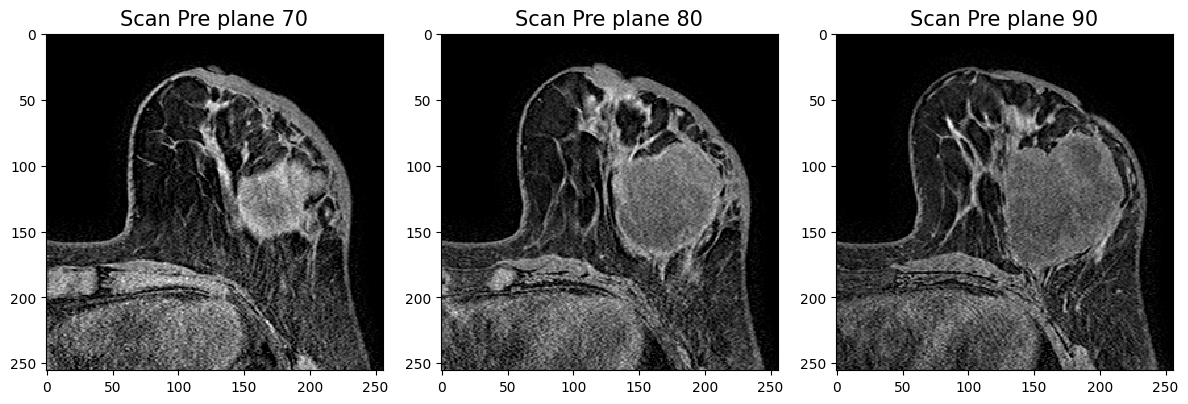

<Figure size 640x480 with 0 Axes>

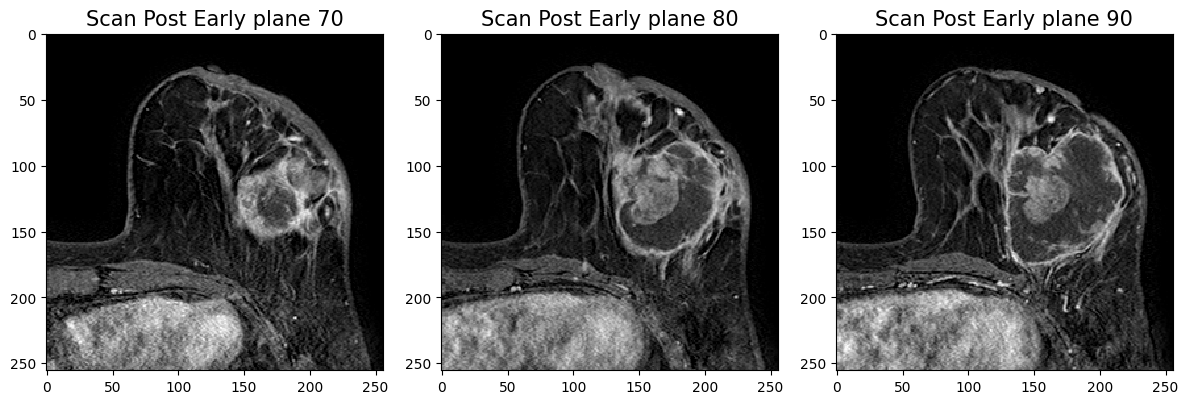

<Figure size 640x480 with 0 Axes>

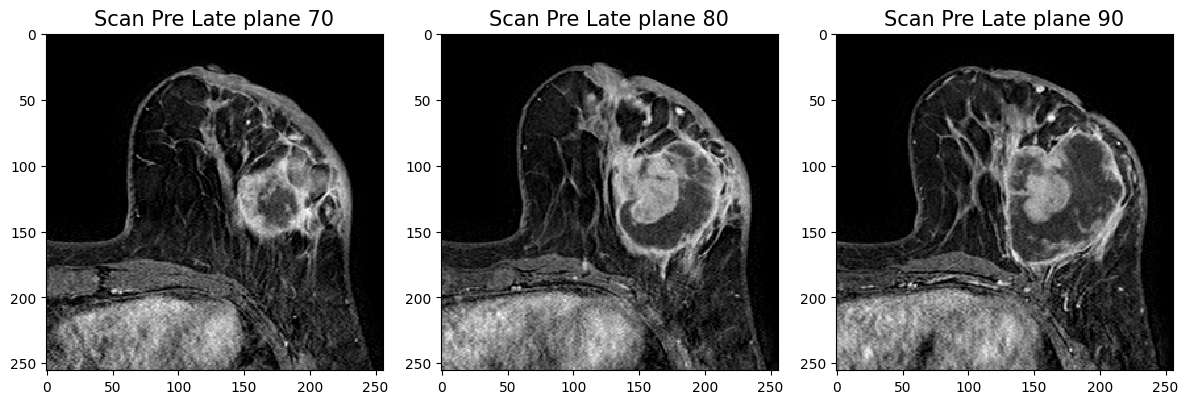

<Figure size 640x480 with 0 Axes>

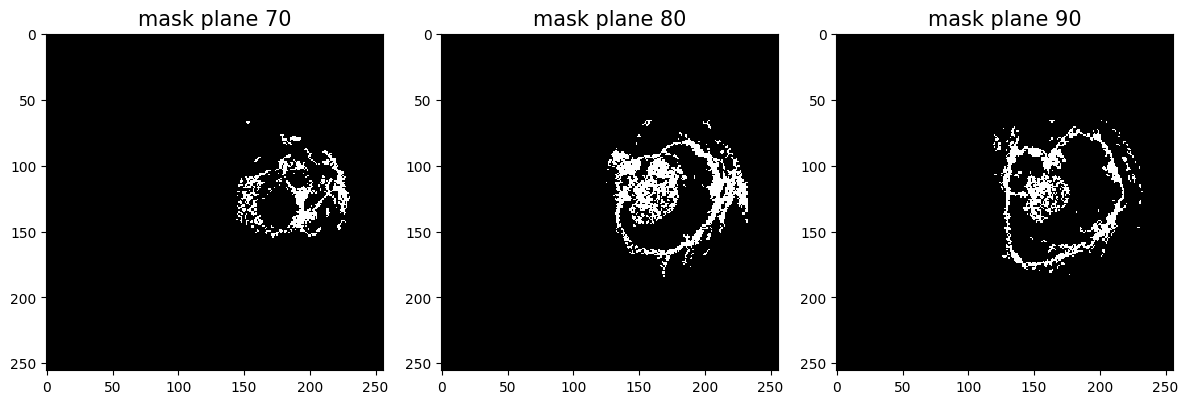

<Figure size 640x480 with 0 Axes>

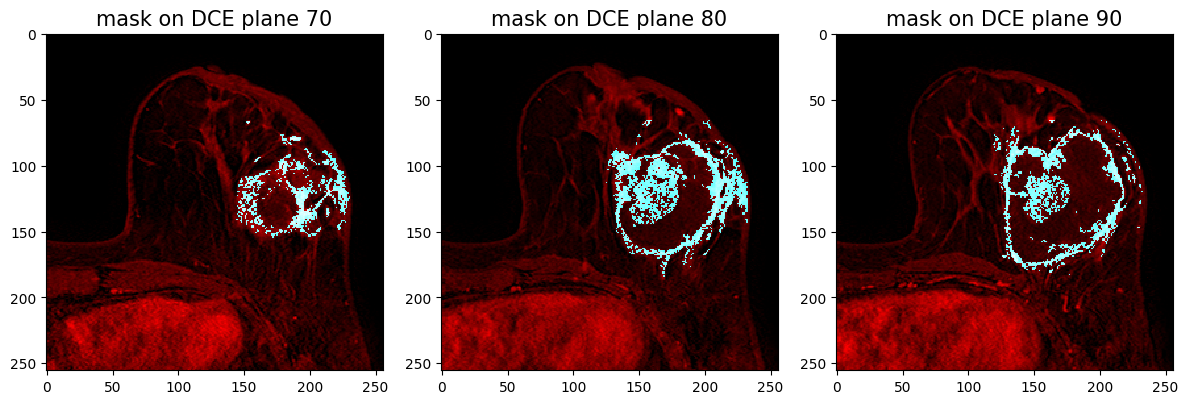

In [22]:
idx=[70,80,90]
show_n_images([d[0][i] for i in idx], titles=['Scan Pre plane '+str(i) for i in idx])
show_n_images([d[1][i] for i in idx], titles=['Scan Post Early plane '+str(i) for i in idx])
show_n_images([d[2][i] for i in idx], titles=['Scan Pre Late plane '+str(i) for i in idx])
show_n_images([m[i] for i in idx], titles=['mask plane '+str(i) for i in idx])
show_n_images([np.stack([minmax(d[1][i]),
                         m[i]/m.max(),m[i]/m.max()],axis=2) for i in idx],
              titles=['mask on DCE plane '+str(i) for i in idx])

## View all aquisitions

In [23]:
d = get_nifti_acquisitions(subject_id)
len(d), d[0].shape

ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce/ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_0.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_1.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_1.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_2.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_2.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_3.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_3.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_4.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_4.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_5.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_5.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_6.nii.gz
ISPY2/data_sample/dce ISPY2-550421_spy2_vis1_dce_aqc_6.nii.gz
ISPY2/da

(7, (160, 256, 256))

====  Scan:  0


<Figure size 640x480 with 0 Axes>

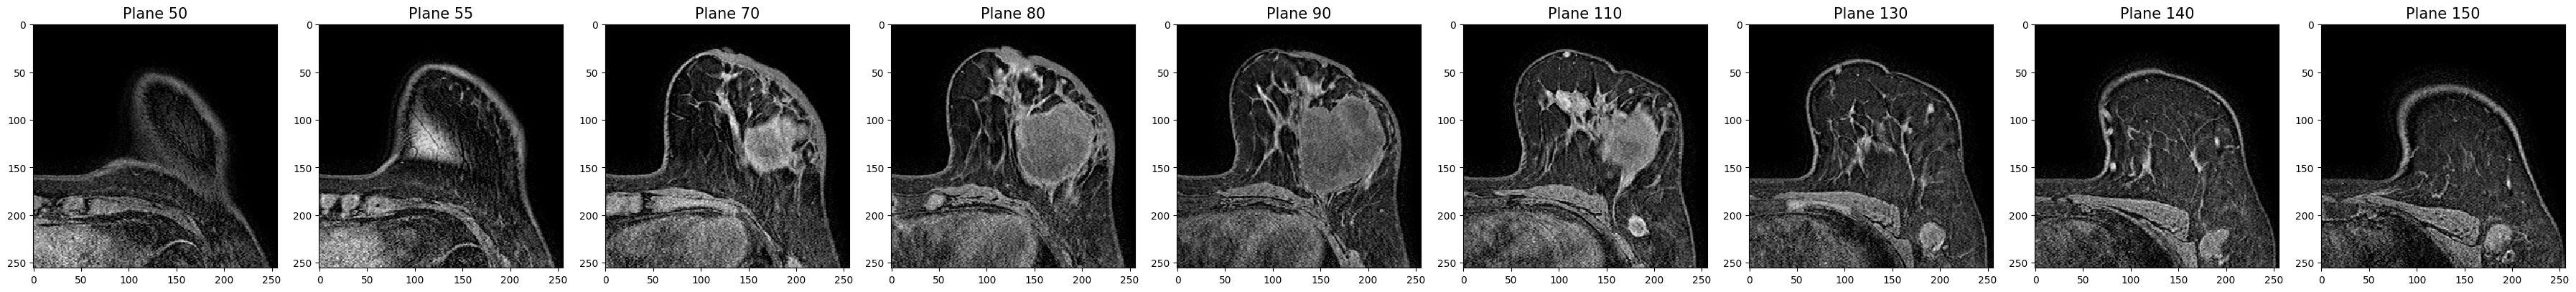

====  Scan:  1


<Figure size 640x480 with 0 Axes>

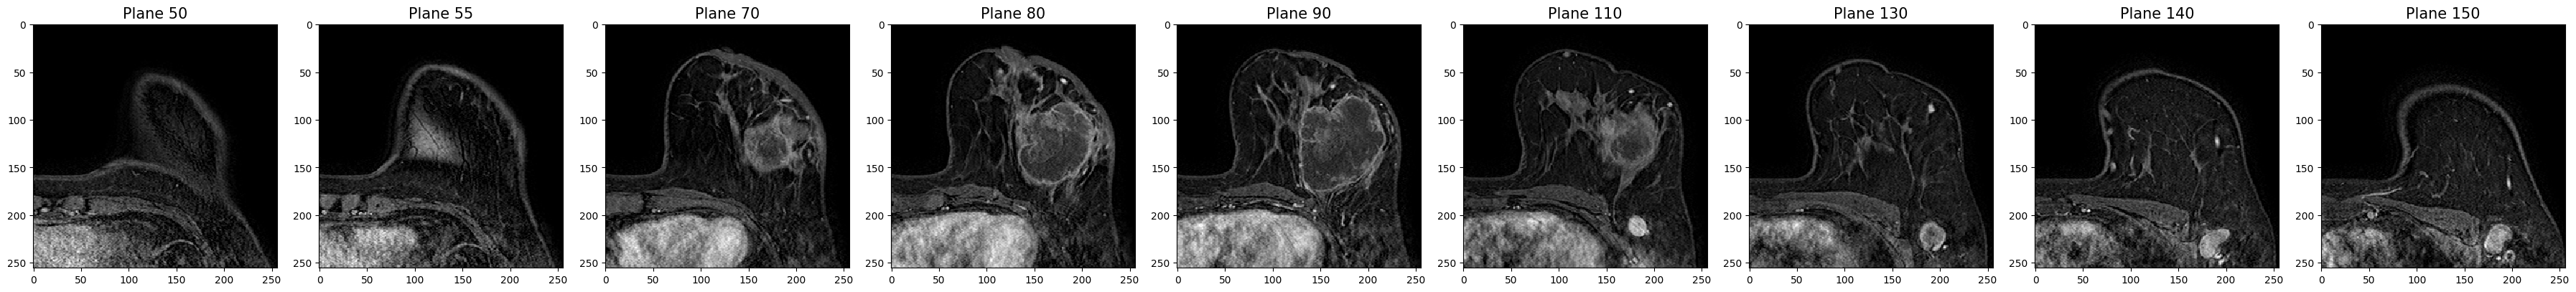

====  Scan:  2


<Figure size 640x480 with 0 Axes>

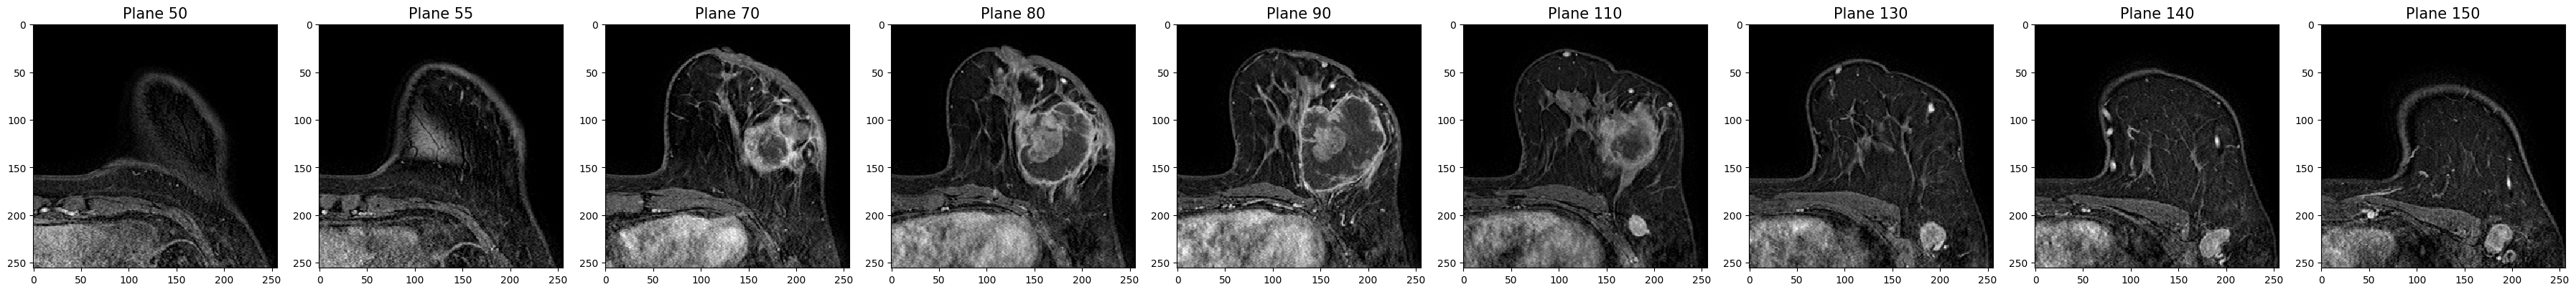

====  Scan:  3


<Figure size 640x480 with 0 Axes>

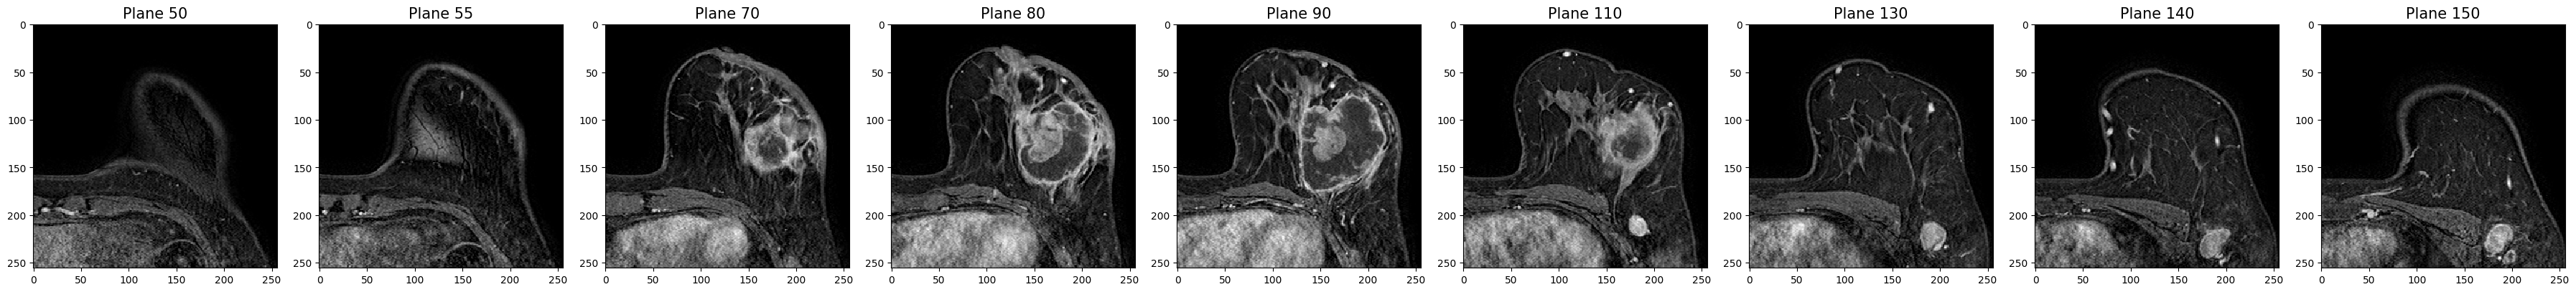

====  Scan:  4


<Figure size 640x480 with 0 Axes>

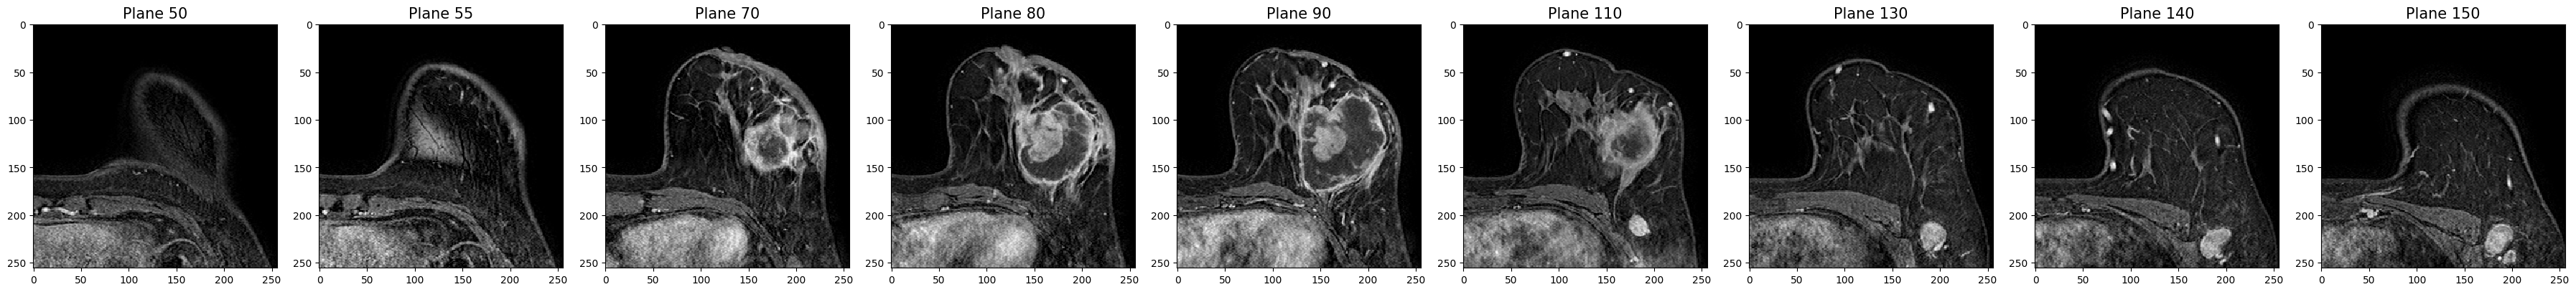

====  Scan:  5


<Figure size 640x480 with 0 Axes>

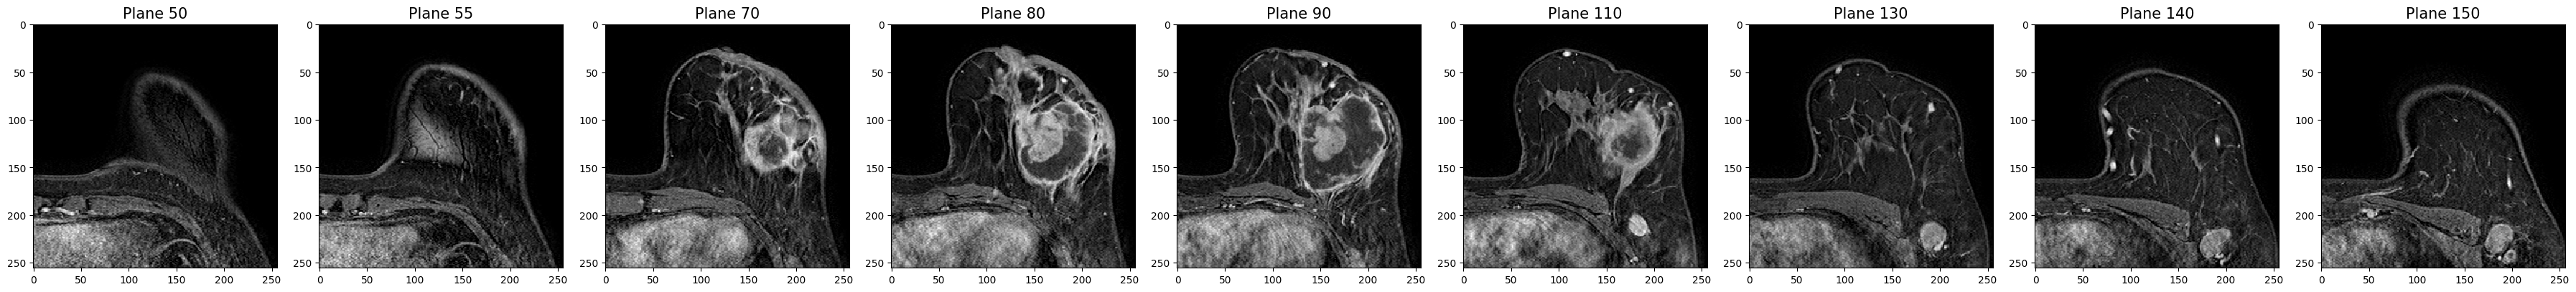

====  Scan:  6


<Figure size 640x480 with 0 Axes>

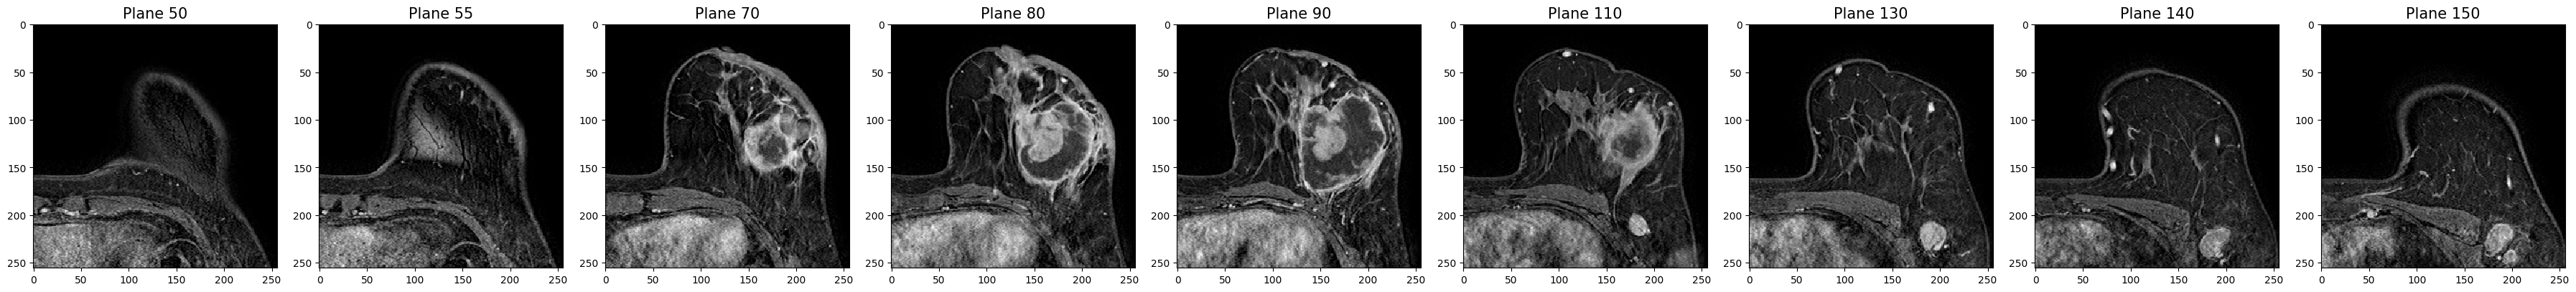

In [24]:
vox_sum=[]
for k in range(7):
    idx=[50,55,70,80,90,110,130,140,150]
    print('====  Scan: ', k)
    show_n_images([d[k][i] for i in idx], titles=['Plane '+str(i) for i in idx])
    vox_sum.append((d[k][80]*m[80]).sum())

In [25]:
for k in range(7):
    idx=[70,80,90]
    print('====  Scan: ', k)
    print_info([d[k][i] for i in idx])


====  Scan:  0
(256, 256) 0.0 1657.0 318.67979431152344 345.8875501507658 n!=0: 42296 493.7818942689616 float64
(256, 256) 0.0 1782.0 351.34779357910156 349.45898619777586 n!=0: 44361 519.0579337706544 float64
(256, 256) 0.0 1939.0 349.36671447753906 337.8391369222718 n!=0: 45422 504.07505173704374 float64
====  Scan:  1
(256, 256) 0.0 3471.0 499.7900695800781 663.9738036098612 n!=0: 42467 771.2869286740292 float64
(256, 256) 0.0 3377.0 567.7644653320312 683.4383590606257 n!=0: 44715 832.1371351895338 float64
(256, 256) 0.0 3408.0 573.0003204345703 669.9375097140735 n!=0: 45570 824.0541803818302 float64
====  Scan:  2
(256, 256) 0.0 2939.0 517.6082916259766 611.8072025751063 n!=0: 43234 784.6134292455013 float64
(256, 256) 0.0 3377.0 623.7575073242188 685.7535549638401 n!=0: 45193 904.5332684265262 float64
(256, 256) 0.0 3158.0 615.9249572753906 668.239484276139 n!=0: 46145 874.7482500812656 float64
====  Scan:  3
(256, 256) 0.0 3127.0 519.9720306396484 612.09841336772 n!=0: 43185 789.

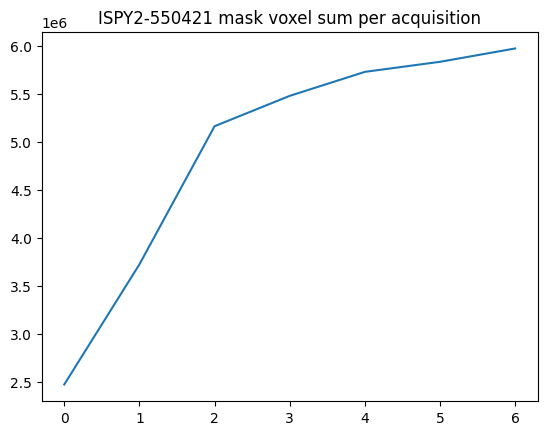

In [26]:
plt.plot(vox_sum)
plt.title('ISPY2-550421 mask voxel sum per acquisition')
plt.show()

# Read DICOM
### Load TCIA metadata

In [27]:
base_path = os.path.join("ISPY2","data_sample","dicom_tcia")

In [28]:
df = pd.read_csv(os.path.join('ISPY2','data_sample','dicom_tcia','metadata.csv'))
df.head()

Series UID  Collection  \
0  1.3.6.1.4.1.14519.5.2.1.7695.4164.136727379647...  ACRIN-6698   
1  1.3.6.1.4.1.14519.5.2.1.7695.4164.150176822414...  ACRIN-6698   
2  1.3.6.1.4.1.14519.5.2.1.7695.4164.168989778085...  ACRIN-6698   
3  1.3.6.1.4.1.14519.5.2.1.7695.4164.221395903073...  ACRIN-6698   
4  1.3.6.1.4.1.14519.5.2.1.7695.4164.101836283294...  ACRIN-6698   

  3rd Party Analysis                   Data Description URI  \
0                 NO  https://doi.org/10.7937/tcia.kk026d95   
1                 NO  https://doi.org/10.7937/tcia.kk026d95   
2                 NO  https://doi.org/10.7937/tcia.kk026d95   
3                 NO  https://doi.org/10.7937/tcia.kk026d95   
4                 NO  https://doi.org/10.7937/tcia.kk026d95   

          Subject ID                                          Study UID  \
0  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   
1  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   
2  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   
3  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   
4  ACRIN-6698-102212  1.3.6.1.4.1.14519.5.2.1.7695.4164.181609193230...   

      Study Description  Study Date  \
0  ACRIN-6698ISPY2MRIT3  09-21-2002   
1  ACRIN-6698ISPY2MRIT3  09-21-2002   
2  ACRIN-6698ISPY2MRIT3  09-21-2002   
3  ACRIN-6698ISPY2MRIT3  09-21-2002   
4  ACRIN-6698ISPY2MRIT3  09-21-2002   

                               Series Description        Manufacturer  \
0  ISPY2 VOLSER uni-lateral cropped Analysis Mask  GE MEDICAL SYSTEMS   
1                 ISPY2 FATIDEAL T2FSEASSET no NP  GE MEDICAL SYSTEMS   
2                             ISPY2 3 Plane Scout  GE MEDICAL SYSTEMS   
3            ISPY2 VOLSER uni-lateral cropped SER  GE MEDICAL SYSTEMS   
4            ISPY2 VOLSER uni-lateral cropped PE6  GE MEDICAL SYSTEMS   

  Modality        SOP Class Name                 SOP Class UID  \
0      SEG  Segmentation Storage  1.2.840.10008.5.1.4.1.1.66.4   
1       MR      MR Image Storage     1.2.840.10008.5.1.4.1.1.4   
2       MR      MR Image Storage     1.2.840.10008.5.1.4.1.1.4   
3       MR      MR Image Storage     1.2.840.10008.5.1.4.1.1.4   
4       MR      MR Image Storage     1.2.840.10008.5.1.4.1.1.4   

   Number of Images File Size  \
0                 1   5.29 MB   
1                55  29.19 MB   
2                58   7.93 MB   
3                80  11.01 MB   
4                80  10.93 MB   

                                       File Location       Download Timestamp  
0  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...  2022-06-14T13:50:23.114  
1  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...  2022-06-14T13:50:36.885  
2  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...  2022-06-14T13:50:58.012  
3  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...  2022-06-14T13:51:05.683  
4  .\ACRIN-6698\ACRIN-6698-102212\1.3.6.1.4.1.145...   2022-06-14T13:51:20.16

In [29]:
def get_visit(x):
    if x[-2:] == 'T0':
        return 'T0'
    elif x[-2:] == 'T1':
        return 'T1'
    elif x[-2:] == 'T2':
        return 'T2'
    elif x[-2:] == 'T3':
        return 'T3'

## Filter Pre Treatment visit

In [30]:
df['Study Description'] = df['Study Description'].apply(lambda x: get_visit(x))

df['Study Description'].value_counts()

df=df[df['Study Description']=='T0']

In [31]:
!ls ISPY2/data_sample/dicom_tcia

ISPY2  metadata.csv


# Analize few example cases

In [32]:
pds = 'ACRIN-6698-378885'
pdg = 'ISPY2-211408'
pdph = 'ISPY2-550421'

In [33]:
import pydicom

# return list of numpy array of voxels
def read_dcm_series(fname, bpath=base_path):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fpathf = join_path(bpath,fname)

    ll = os.listdir(fpathf)
    pe=[]
    for p in ll:
            d = pydicom.dcmread(join_path(fpathf,p))
            pe.append(d.pixel_array)
    return pe

# returns list of dcm objectys
def read_dcm_series_dicom(fname, bpath=base_path):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    fpathf = join_path(bpath,fname)

    ll = os.listdir(fpathf)
    pe=[]
    for p in ll:
            d = pydicom.dcmread(join_path(fpathf,p))
            pe.append(d)
    return pe

def get_dicom_val(d, tag=(0x0020, 0x0105)):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)
    val = d.get(tag).value if tag in d else None
    return val

### Read Dynamic Contrast MRI for ISPY2-550421

In [34]:
tmp=df[df['Subject ID']==pdph]
tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']


Series UID Collection  \
27753  1.3.6.1.4.1.14519.5.2.1.2391467408296345373628...      ISPY2   

      3rd Party Analysis                   Data Description URI    Subject ID  \
27753                 NO  https://doi.org/10.7937/TCIA.D8Z09T85  ISPY2-550421   

                                               Study UID Study Description  \
27753  1.3.6.1.4.1.14519.5.2.1.9261051656703003861157...                T0   

       Study Date                             Series Description  \
27753  04-13-2003  ISPY2 VOLSER uni-lateral cropped original DCE   

                  Manufacturer Modality    SOP Class Name  \
27753  Philips Medical Systems       MR  MR Image Storage   

                   SOP Class UID  Number of Images  File Size  \
27753  1.2.840.10008.5.1.4.1.1.4              1120  150.81 MB   

                                           File Location  \
27753  .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...   

            Download Timestamp  
27753  2022-06-23T04:30:18.087

In [35]:
fname = tmp[tmp['Series Description']=='ISPY2 VOLSER uni-lateral cropped original DCE']['File Location'].values[0]
fname

'.\\ISPY2\\ISPY2-550421\\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\\1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161'

In [36]:
join_path(base_path, fname)

ISPY2/data_sample/dicom_tcia ./ISPY2/ISPY2-550421/1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823/1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


'ISPY2/data_sample/dicom_tcia/./ISPY2/ISPY2-550421/1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823/1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161'

In [37]:
os.listdir(join_path(base_path, fname))

ISPY2/data_sample/dicom_tcia ./ISPY2/ISPY2-550421/1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823/1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


['1-1119.dcm',
 '1-1120.dcm',
 '1-1117.dcm',
 '1-0002.dcm',
 '1-0001.dcm',
 '1-1118.dcm',
 '1-1116.dcm']

## Dynamic Contrast MRI Scan Details for ISPY2-550421

- **Total Slices:** 1120  
- **Number of MRI Scans:** 7  
- **Slices per MRI Scan:** 1120 / 7 = **160 slices per scan**  

#### **Acquisition Timing**
- The **first scan** is taken **before contrast injection**.  
- The **remaining 6 scans** are acquired **after injection**, with a time interval of approximately **1.5 minutes** between each.  

#### **Processing Steps**
1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  
2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  


## 1. **Group slices by acquisition time** (i.e., pre-contrast and post-contrast phases).  

In [38]:
d=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-0001.dcm'))
d

ISPY2/data_sample/dicom_tcia ./ISPY2/ISPY2-550421/1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823/1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.112536240787848205223290395402236478818
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'NONE']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.112536240787848205

## Dicom Temporal information
### slice 1-0001.dcm
```
(0020,0013) Instance Number                     IS: '1'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 62.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,0060) Laterality                          CS: 'L'
(0020,0100) Temporal Position Identifier        IS: '0'
(0020,0105) Number of Temporal Positions        IS: '6'
(0020,1040) Position Reference Indicator        LO: ''
(0020,1041) Slice Location                      DS: '213'

(0117,1030) Private tag data                    IS: '7'  # Total phases Number
(0117,1031) Private tag data                    DS: '81.832862854'   # Single phase acquisition duration
(0117,1033) Private tag data                    TM: '073158.20'   # Injection time
# phase encoding effective time half way through the acquisition
(0117,1034) Private tag data                    DS: [-73.8535614014, 40.916431427, 122.2864379883, 203.6464233398, 285.006439209, 366.3764343262, 447.7364501953]
```

### **Understanding the Timing of Scans and Contrast Injection in Dynamic Contrast-Enhanced MRI (DCE-MRI)**

In **DCE-MRI**, multiple image acquisitions (phases) are taken over time **before and after** a contrast agent injection. Your DICOM metadata contains important timing information regarding when the scans are taken relative to the contrast injection.

---

## **Temporal Key DICOM Tags**
### **1️⃣ Total Phases Number (0117,1030) - Private Tag**
- **Type:** `IS` (Integer String)
- **Example Value:** `'7'`
- **Meaning:** This represents the **total number of acquisitions (phases)** in the DCE-MRI study, including **one pre-contrast phase** and **multiple post-contrast phases**.

**Interpretation**:  
- `'7'` means **one pre-contrast** and **six post-contrast** phases were acquired.
- These phases are acquired at different time points **before and after** contrast injection.

---

### **2️⃣ Single Phase Acquisition Duration (0117,1031) - Private Tag**
- **Type:** `DS` (Decimal String)
- **Example Value:** `'81.832862854'` (in seconds)
- **Meaning:** Duration of a **single acquisition phase**.

**Interpretation**:  
- Each phase takes **81.83 seconds** to acquire.
- If there are 7 phases, the total scan time will be **approximately** `7 × 81.83 ≈ 573 seconds (9.5 minutes)`.

---

### **3️⃣ Injection Time (0117,1033) - Private Tag**
- **Type:** `TM` (Time)
- **Example Value:** `'073158.20'` (HHMMSS.FF)
- **Meaning:** The **exact scanner clock time** when contrast injection was administered.

**Interpretation**:  
- The contrast injection happened at **07:31:58.20 AM**.
- This time acts as the **reference point** for determining post-contrast acquisitions.

---

### **4️⃣ Effective Acquisition Delay (0117,1034) - Private Tag**
- **Type:** `DS (1-n)` (List of Decimal Strings)
- **Example Value:**
  ```plaintext
  [-73.85, 40.91, 122.28, 203.65, 285.00, 366.37, 447.73]
  ```
- **Meaning:** Time delays (in seconds) relative to **the first post-contrast phase**.

**Interpretation**:  
- **Negative values (`-73.85`)** indicate pre-contrast acquisition (`~74 sec before injection`).
- **Positive values (`40.91`, `122.28`, etc.)** indicate post-contrast acquisitions at these time points after injection.

---

### **5️⃣ Number of Temporal Positions (0020,0105)**
- **Type:** `IS` (Integer String)
- **Example Value:** `'6'`
- **Meaning:** The **number of distinct time points** recorded in this dynamic MRI scan.

**Interpretation**:  
- There are **6 temporal positions**, which correspond to the number of post-contrast scans.

---

## **When Are the Scans Taken**
Based on these values, here’s the approximate timeline of the scan:

| **Phase** | **Time (seconds)** | **Relative to Injection** |
|-----------|------------------|----------------------|
| **Pre-Contrast** | `-73.85` sec | **Before injection** |
| **1st Post-Contrast** | `40.91` sec | **40.91 sec after injection** |
| **2nd Post-Contrast** | `122.28` sec | **122.28 sec after injection** |
| **3rd Post-Contrast** | `203.65` sec | **203.65 sec after injection** |
| **4th Post-Contrast** | `285.00` sec | **285 sec after injection** |
| **5th Post-Contrast** | `366.37` sec | **366.37 sec after injection** |
| **6th Post-Contrast** | `447.73` sec | **447.73 sec after injection** |

---

### **Summary of Timing & Injection Process**
1. **A pre-contrast scan** is taken **~74 seconds before** contrast injection.
2. **Contrast is injected at** `07:31:58.20 AM`.
3. **Post-contrast scans are taken** at different time points after injection (`40.91 sec`, `122.28 sec`, etc.).
4. The **total number of phases** (scans) is **7** (1 pre-contrast + 6 post-contrast).
5. **Each phase acquisition takes** `81.83 sec`.

---

### **Why This Matters in DCE-MRI**
- The **first post-contrast scan** shows **early enhancement** (blood supply to tissues).
- Later phases help differentiate **benign vs. malignant** lesions based on **washout curves**.
- **Temporal Position Identifier (0020,0100)** tells us which phase each image belongs to.


In [39]:
d=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-0002.dcm'))
d

ISPY2/data_sample/dicom_tcia ./ISPY2/ISPY2-550421/1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823/1.3.6.1.4.1.14519.5.2.1.239146740829634537362812272125119234161


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 204
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6955632577893836251226799912786684492
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'NONE']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.69556325778938362512

## 2. **Order slices spatially** based on their anatomical position to ensure correct reconstruction.  

### Dicom spatial information
### slice 1-0001.dcm
```
(0020,0013) Instance Number                     IS: '1'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 62.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,1041) Slice Location                      DS: '213'
```

### slice 1-0002.dcm
```
(0020,0013) Instance Number                     IS: '2'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, 61.1355361938]
(0020,0052) Frame of Reference UID              UI: 1.3.6.1.4.1.14519.5.2.1.19848329376685071829001531299299662674
(0020,1041) Slice Location                      DS: '214'
```

### slice 1-1116.dcm
```
(0020,0013) Instance Number                     IS: '1116'
(0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, -92.8644638062]
(0020,1041) Slice Location                      DS: '368'

* slicw 1: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, 62.1355361938]
* slice 2: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, 61.1355361938]
* slice 1116: (0020,0032) Image Position (Patient)  DS: [-20.2284866531, -133.1898132546, -92.8644638062]

### **Positioning Tags in DICOM**
These tags provide information about the **spatial location and orientation** of the image within the 3D coordinate system of the patient.

---

## **1️⃣ (0020,0032) Image Position (Patient)**
- **Type:** `DS (Decimal String)` – 3 values in millimeters `(X, Y, Z)`
- **Example Value:** `[-20.2284866531, -133.1898132546, 62.1355361938]`
- **Meaning:** This gives the **coordinates of the center of the top-left pixel** (first row, first column) **in the DICOM 3D coordinate system**.

**How It Works:**
- The **DICOM coordinate system** follows:
  - **X**: Left (-) to Right (+)
  - **Y**: Posterior (-) to Anterior (+)
  - **Z**: Inferior (-) to Superior (+)

**Interpretation of the Example:**
- **X = -20.23 mm** → The image is **20.23 mm left** of the reference point.
- **Y = -133.19 mm** → The image is **133.19 mm posterior (towards the back)**.
- **Z = 62.14 mm** → The image is **62.14 mm above the reference point**.

## 2️⃣  (0020,1041) Slice Location in DICOM

🔹 **Tag:** `(0020,1041)`  
🔹 **Type:** `DS (Decimal String)`  
🔹 **Example Value:** `'213'`  
🔹 **Meaning:** Represents the **relative position** of the image slice along the **Z-axis (Superior-Inferior direction)**.

### 🔹 How is Slice Location (0020,1041) Used?

#### **🔹 Relative Positioning**
- `Slice Location` is often used for **sorting slices** in **sequential imaging** (e.g., MRI or CT scans).  
- It provides a **reference value** (not absolute) to determine if a slice is positioned **higher or lower** compared to others.

#### **🔹 Comparison with Image Position (0020,0032)**
- **Image Position (Patient) `(0020,0032)`** provides the **absolute position** in **millimeters** within the patient’s coordinate system.  
- **Slice Location `(0020,1041)`** is often a **simplified or derived value** used for sorting slices within a series.

#### **🔹 Usage in Multi-Phase Imaging (DCE-MRI)**
- Since **(0020,0100) Temporal Position Identifier = '0'**, this is likely the **first temporal position** in a **dynamic contrast-enhanced MRI** scan.  
- The **Slice Locatio



### Read Analysis mask of MRI for ISPY2-550421

In [40]:
tmp=df[df['Subject ID']==pdph]
tmp[tmp['Series Description'].str.contains('Analysis Mask')]


Series UID Collection  \
27746  1.3.6.1.4.1.14519.5.2.1.1894143341658644110463...      ISPY2   

      3rd Party Analysis                   Data Description URI    Subject ID  \
27746                 NO  https://doi.org/10.7937/TCIA.D8Z09T85  ISPY2-550421   

                                               Study UID Study Description  \
27746  1.3.6.1.4.1.14519.5.2.1.9261051656703003861157...                T0   

       Study Date                              Series Description  \
27746  04-13-2003  ISPY2 VOLSER uni-lateral cropped Analysis Mask   

                  Manufacturer Modality        SOP Class Name  \
27746  Philips Medical Systems      SEG  Segmentation Storage   

                      SOP Class UID  Number of Images File Size  \
27746  1.2.840.10008.5.1.4.1.1.66.4                 1  10.57 MB   

                                           File Location  \
27746  .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...   

            Download Timestamp  
27746  2022-06-23T04:24:30.435

In [41]:
fname = tmp[tmp['Series Description'].str.contains('Analysis Mask')]['File Location'].values[0]

In [42]:
os.path.join(base_path, fname)

'ISPY2/data_sample/dicom_tcia/.\\ISPY2\\ISPY2-550421\\1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823\\1.3.6.1.4.1.14519.5.2.1.189414334165864411046338906393382013183'

In [43]:
os.listdir(join_path(base_path, fname))

ISPY2/data_sample/dicom_tcia ./ISPY2/ISPY2-550421/1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823/1.3.6.1.4.1.14519.5.2.1.189414334165864411046338906393382013183


['1-1.dcm']

#### Read analysis mask, and save slices positions

In [44]:
mask_dcm=pydicom.dcmread(os.path.join(join_path(base_path, fname),'1-1.dcm'))
mask_dcm

ISPY2/data_sample/dicom_tcia ./ISPY2/ISPY2-550421/1.3.6.1.4.1.14519.5.2.1.92610516567030038611570123081828666823/1.3.6.1.4.1.14519.5.2.1.189414334165864411046338906393382013183


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Segmentation Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.263671321535968234350212444349687282968
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008,0016) SOP Class UID                       UI: Segmentation Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.263671321535968234350212444349

### Mask dicom contains the positions of all the slices
```
(0020,9111)  Frame Content Sequence  1 item(s) ----
      (0020,9057) In-Stack Position Number            UL: 110
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, -46.8644638062]
      ---------
   ---------
 (0020,9111)  Frame Content Sequence  1 item(s) ----
      (0020,9057) In-Stack Position Number            UL: 111
      ---------
   (0020,9113)  Plane Position Sequence  1 item(s) ----
      (0020,0032) Image Position (Patient)            DS: [-20.2284866531, -133.1898132546, -47.8644638062]
```

In [45]:
def extract_image_positions(dicom):
    # Copyright (c) 2025 Naomi Fridman - Licensed under CC BY 4.0
    # (https://creativecommons.org/licenses/by/4.0/)

    """
    Extracts Image Position (Patient) values from a multi-frame DICOM file
    and returns them as a pandas DataFrame.

    Parameters:
    dicom: DICOM file.

    Returns:
    pd.DataFrame: DataFrame containing frame number and (X, Y, Z) positions.
    """
    # Load the DICOM file
    dicom_file = dicom

    # Extract all image positions
    image_positions = []

    if "PerFrameFunctionalGroupsSequence" in dicom_file:
        for frame_idx, frame in enumerate(dicom_file.PerFrameFunctionalGroupsSequence):
            if "PlanePositionSequence" in frame:
                position = list(frame.PlanePositionSequence[0].ImagePositionPatient)  # Convert MultiValue to list
                image_positions.append([frame_idx] + position)

    # Create a DataFrame
    df_positions = pd.DataFrame(image_positions, columns=["Frame", "X", "Y", "Z"])

    return df_positions

In [46]:
df_pos = extract_image_positions(mask_dcm)
df_pos.head()

Frame          X           Y          Z
0      0 -20.228487 -133.189813  62.135536
1      1 -20.228487 -133.189813  61.135536
2      2 -20.228487 -133.189813  60.135536
3      3 -20.228487 -133.189813  59.135536
4      4 -20.228487 -133.189813  58.135536

In [47]:
df_pos.tail()

Frame          X           Y          Z
155    155 -20.228487 -133.189813 -92.864464
156    156 -20.228487 -133.189813 -93.864464
157    157 -20.228487 -133.189813 -94.864464
158    158 -20.228487 -133.189813 -95.864464
159    159 -20.228487 -133.189813 -96.864464

In [48]:
pd.set_option("display.float_format", "{:.5f}".format)


In [49]:
df_pos.describe()

Frame         X          Y         Z
count 160.00000 160.00000  160.00000 160.00000
mean   79.50000 -20.22849 -133.18981 -17.36446
std    46.33213   0.00000    0.00000  46.33213
min     0.00000 -20.22849 -133.18981 -96.86446
25%    39.75000 -20.22849 -133.18981 -57.11446
50%    79.50000 -20.22849 -133.18981 -17.36446
75%   119.25000 -20.22849 -133.18981  22.38554
max   159.00000 -20.22849 -133.18981  62.13554

## Organizing DCE-MRI Slices of all acquisitions by Z-Axis Position

We observe that the slices are ordered along the **Z-axis**, ranging from `-96.86446` to `62.13554`. Using this information, we can correctly **organize all 1120 DCE-MRI slices** into their respective positions.

### **Steps for Organizing Slices**
1. **Initialize Storage Arrays**  
   - We create **7 zero arrays** (one for each acquisition), each with a shape of `(160, 256, 256)`, corresponding to **160 slices per acquisition**.

2. **Assign Slices to Their Correct Positions**  
   - We iterate through all slices and **insert each slice** into its appropriate position based on its **Z-location**.

This structured approach ensures that the DCE-MRI dataset is accurately **reconstructed in spatial order**.
To keep coherence, we sort all mri slices of mask and acuisition in an increasing order.

# --------------------------------------------------------------------------------------------------
#     Orgenize data downloaded from tcia with csv  files
* Top use rhis code, you need to download data from TCAI
* org_path is the path to where you downloada the data

In [50]:
org_path = "D:\\SPY\\manifest-1636041418053\\"

In [51]:
csv_path = os.path.join('ISPY2','data_sample','csv')

In [52]:
df_csv = pd.read_csv(os.path.join(csv_path, 'ISPY2-550421_dcm_croped.csv'))
df_csv.head(2)

pid   vis       fname  org_idx  location  pat_pos_x  pat_pos_y  \
0  ISPY2-550421  vis1  1-0160.dcm      159 372.00000  -20.22849 -133.18981   
1  ISPY2-550421  vis1  1-0159.dcm      158 371.00000  -20.22849 -133.18981   

   pat_pos_z  in_stack_pos  Acq_tm  ...  pix_type  FirstPostIndex  \
0  -96.86446           NaN   73003  ...    uint16               1   
1  -95.86446           NaN   73003  ...    uint16               1   

   CropSourceNPixels  CropTargetNPixels  CropPixelLimitsStart  \
0    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
1    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   

   CropPixelLimitsEnd                                            dirname  \
0     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
1     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   

   adj_Acq_tm  adj_Cont_tm                                        org_dirname  
0       73003       211400  .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...  
1       73003       211400  .\ISPY2\ISPY2-550421\1.3.6.1.4.1.14519.5.2.1.9...  

[2 rows x 30 columns]

In [53]:
### temporal_id is index of acquisition

In [54]:
df_csv.columns

Index(['pid', 'vis', 'fname', 'org_idx', 'location', 'pat_pos_x', 'pat_pos_y',
       'pat_pos_z', 'in_stack_pos', 'Acq_tm', 'Cont_tm', 'n_aqc',
       'temporal_id', 'pix_h', 'pix_w', 'n_tmp_pos_post', 'n_tmp_pos_total',
       'lut', 'intercept', 'slope', 'pix_type', 'FirstPostIndex',
       'CropSourceNPixels', 'CropTargetNPixels', 'CropPixelLimitsStart',
       'CropPixelLimitsEnd', 'dirname', 'adj_Acq_tm', 'adj_Cont_tm',
       'org_dirname'],
      dtype='object')

In [55]:
df_csv.temporal_id.value_counts()

temporal_id
0    160
1    160
2    160
3    160
4    160
5    160
6    160
Name: count, dtype: int64

In [56]:
## Ge

In [57]:
df_acquisition_0 = df_csv[df_csv.temporal_id==0].copy()
df_acquisition_0

pid   vis       fname  org_idx  location  pat_pos_x  pat_pos_y  \
0    ISPY2-550421  vis1  1-0160.dcm      159 372.00000  -20.22849 -133.18981   
1    ISPY2-550421  vis1  1-0159.dcm      158 371.00000  -20.22849 -133.18981   
2    ISPY2-550421  vis1  1-0158.dcm      157 370.00000  -20.22849 -133.18981   
3    ISPY2-550421  vis1  1-0157.dcm      156 369.00000  -20.22849 -133.18981   
4    ISPY2-550421  vis1  1-0156.dcm      155 368.00000  -20.22849 -133.18981   
..            ...   ...         ...      ...       ...        ...        ...   
155  ISPY2-550421  vis1  1-0005.dcm        4 217.00000  -20.22849 -133.18981   
156  ISPY2-550421  vis1  1-0004.dcm        3 216.00000  -20.22849 -133.18981   
157  ISPY2-550421  vis1  1-0003.dcm        2 215.00000  -20.22849 -133.18981   
158  ISPY2-550421  vis1  1-0002.dcm        1 214.00000  -20.22849 -133.18981   
159  ISPY2-550421  vis1  1-0001.dcm        0 213.00000  -20.22849 -133.18981   

     pat_pos_z  in_stack_pos  Acq_tm  ...  pix_type  FirstPostIndex  \
0    -96.86446           NaN   73003  ...    uint16               1   
1    -95.86446           NaN   73003  ...    uint16               1   
2    -94.86446           NaN   73003  ...    uint16               1   
3    -93.86446           NaN   73003  ...    uint16               1   
4    -92.86446           NaN   73003  ...    uint16               1   
..         ...           ...     ...  ...       ...             ...   
155   58.13554           NaN   73003  ...    uint16               1   
156   59.13554           NaN   73003  ...    uint16               1   
157   60.13554           NaN   73003  ...    uint16               1   
158   61.13554           NaN   73003  ...    uint16               1   
159   62.13554           NaN   73003  ...    uint16               1   

     CropSourceNPixels  CropTargetNPixels  CropPixelLimitsStart  \
0      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
1      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
2      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
3      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
4      [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
..                 ...                ...                   ...   
155    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
156    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
157    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
158    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   
159    [512, 512, 214]    [256, 256, 160]         [233, 99, 48]   

     CropPixelLimitsEnd                                            dirname  \
0       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
1       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
2       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
3       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
4       [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
..                  ...                                                ...   
155     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
156     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
157     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
158     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   
159     [488, 354, 207]  .\ISPY2\ISPY2-550421\04-13-2003-550421T0-ISPY2...   

     adj_Acq_tm  adj_Cont_tm  \
0         73003       211400   
1         73003       211400   
2         73003       211400   
3         73003       211400   
4         73003       211400   
..          ...          ...   
155       73003       211356   
156       73003       211356   
157       73003       211356   
158       73003       211356   
159       73003       211356   

                                           org_dirname  
0    .\ISPY2\ISP

In [59]:
import IPython

# Check your condition (e.g., if in Colab)
if os.path.exists(org_path):
    print("No raw data - stopping execution")
    IPython.get_ipython().stop()

In [ ]:
dcm_0=np.zeros((160,256,256))
df_acquisition_0 = df_csv[df_csv.temporal_id==0].copy()
df_acquisition_0 = df_acquisition_0.sort_values('pat_pos_z').reset_index(drop=True)
for i,row in df_acquisition_0.iterrows():
    p = row['pid']
    dname = row['org_dirname']
    fname = row['fname']
    x = pydicom.dcmread(os.path.join(join_path(org_path, dname), fname))

    dcm_0[i] = x.pixel_array

In [ ]:
dcm_2=np.zeros((160,256,256))
df_acquisition_2 = df_csv[df_csv.temporal_id==2].copy()
df_acquisition_2 = df_acquisition_2.sort_values('pat_pos_z').reset_index(drop=True)
for i,row in df_acquisition_2.iterrows():
    p = row['pid']
    dname = row['org_dirname']
    fname = row['fname']
    x = pydicom.dcmread(os.path.join(org_path, dname, fname))

    dcm_2[i] = x.pixel_array

In [ ]:
dcm_6=np.zeros((160,256,256))
df_acquisition_6 = df_csv[df_csv.temporal_id==6].copy()
df_acquisition_6 = df_acquisition_6.sort_values('pat_pos_z').reset_index(drop=True)
for i,row in df_acquisition_6.iterrows():
    p = row['pid']
    dname = row['org_dirname']
    fname = row['fname']
    x = pydicom.dcmread(os.path.join(join_path(org_path, dname), fname))

    dcm_6[i] = x.pixel_array

# Visualize SER acquisitions 0 (pre injection), 2 (post early), 6 (post late)

In [ ]:
idx=[70,80,90]
show_n_images([dcm_0[i] for i in idx], titles=['Scan Pre plane '+str(i) for i in idx])
show_n_images([dcm_2[i] for i in idx], titles=['Scan post early (2)  plane '+str(i) for i in idx])
show_n_images([dcm_6[i] for i in idx], titles=['Scan post late (6)  plane '+str(i) for i in idx])
show_n_images([np.stack([minmax(dcm_0[i]),
                         m[i]/m.max(),m[i]/m.max()],axis=2) for i in idx],
              titles=['mask on DCE plane '+str(i) for i in idx])